## Аппроксимация двумя экспонентами. Нелинейный МНК

In [181]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import linalg
from matplotlib.patches import Rectangle
plt.rcParams.update({'font.size': 18})

tdata = np.array([7.0,7.0,14.8,16.0,16.9,17.0,18.8,19.0,20.9,15.8,16.8,28.0,53.0,54.0,57.0,85.0,109.0,110.0,141.0,142.0,168.0])
Ldata = np.array([0.6310,0.8318,0.2754,0.1445,0.2089,0.1585,0.1585,0.1318,0.1585,0.1096,0.1445,0.09120,0.06310,0.06918,0.05754,0.03631,0.02291,0.02291,0.01738,0.01585,0.009120])
tt = np.linspace(5, 170, 1000)
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)

def funcL(t, С1, С2, alpha1, alpha2):
    return С1*np.exp(-t/alpha1)+ С2*np.exp(-t/alpha2)

def Error(data,popt):
    sum = 0
    for i in range(len(data)):
        sum += (data[i]-[funcL(i, *popt) for i in tdata][i])**2
    return sum

def graf(p0,color):
    popt, pcov = curve_fit(funcL, tdata, Ldata, p0)
    Error_val = Error(Ldata,popt)
    perr = np.sqrt(np.diag(pcov))
    print('Ошибки стандартного отклонения для параметров: perr=',perr)
    L = [funcL(i, *popt) for i in tt]
    
    plt.title('Нелинейный МНК')
    plt.xlabel("t")
    plt.ylabel("L(t)")
    
    Data, = plt.plot(tdata, Ldata,'o', color='tab:orange',label='Data')
    NL_LS, = plt.plot(tt,L,color, label='Нелинейный МНК')
    
    text1 = 'Начальные значения: C1 =' + str(p0[0]) + '     C2 =' + str(p0[1]) + '     alpha1 =' + str(p0[2]) + '     alpha2 =' + str(p0[3])
    text2 = 'Функция L(t) имеет вид: L(t) =' + str(round(popt[0],3)) + '*e^(t/' + str(round(popt[2],3)) + ')+' + str(round(popt[1],3)) + '*e^(t/' + str(round(popt[3],3)) + ')'
    text3 = 'Error = ' + str(Error_val)
    plt.legend([Data, NL_LS, extra, extra, extra],[Data.get_label(), NL_LS.get_label(), text1, text2,  text3], prop={'size': 16})

За основу возьмём начальные условия: 

$C_{1}$ = 1

$C_{2}$ = 1

$\alpha_{1}$ = 1

$\alpha_{2}$ = 1

Error = 0.03582789638480637

Ошибки стандартного отклонения для параметров: perr= [ 2.1283901   0.09006667  1.51163084 36.78974974]


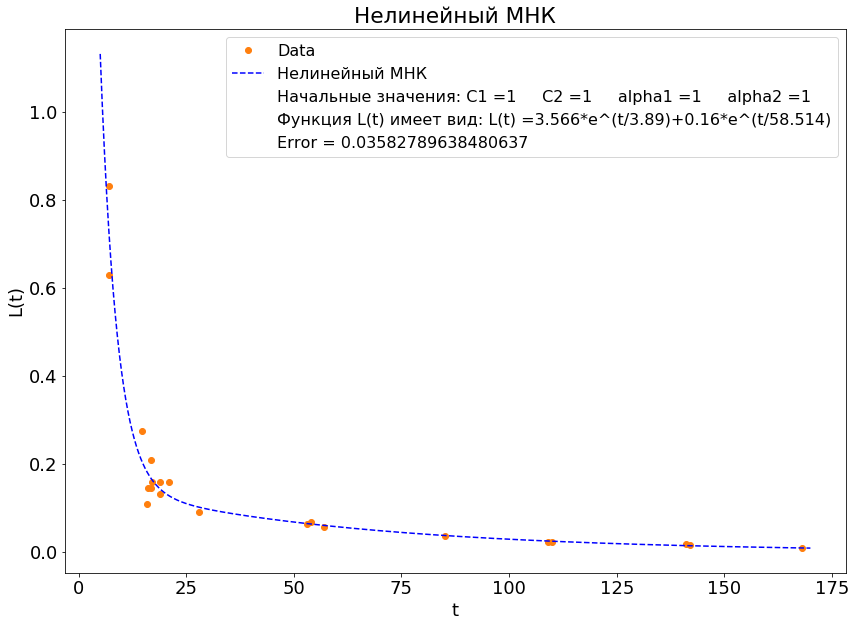

In [182]:
plt.figure(figsize=(14,10))
graf([1,1,1,1],'b--')

Сильное увеличение или уменьшение начального значения параметра $C_{1}$ или $C_{2}$ уменьшает ошибку не значительно

при $C_{1}$ = 500; $C_{2}$ = 1; $\alpha_{1}$ = 1; $\alpha_{2}$ = 1: **Error** = 0.03582789638480634

при $C_{1}$ = 1; $C_{2}$ = 500; $\alpha_{1}$ = 1; $\alpha_{2}$ = 1: **Error** = 0.035827896384806275

при $C_{1}$ = -500; $C_{2}$ = 1; $\alpha_{1}$ = 1; $\alpha_{2}$ = 1: **Error** = 0.03582789638480585

при $C_{1}$ = 1; $C_{2}$ = -500; $\alpha_{1}$ = 1; $\alpha_{2}$ = 1: **Error** = 0.03582789638480595

Ошибки стандартного отклонения для параметров: perr= [ 2.12850724  0.09006708  1.51164237 36.78872532]


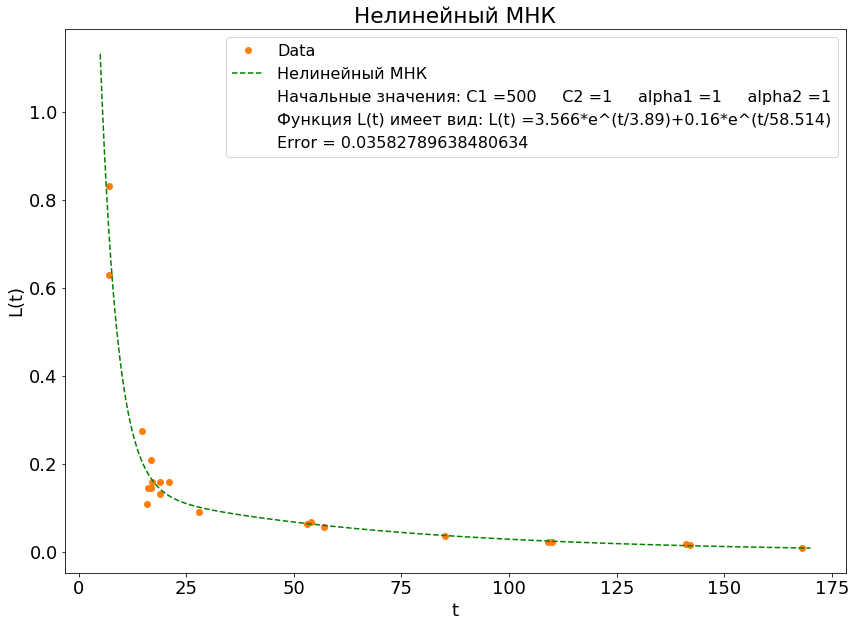

Ошибки стандартного отклонения для параметров: perr= [ 0.09006707  2.12850588 36.78873685  1.5116422 ]
Ошибки стандартного отклонения для параметров: perr= [ 2.1284041   0.0900667   1.51163201 36.7896327 ]


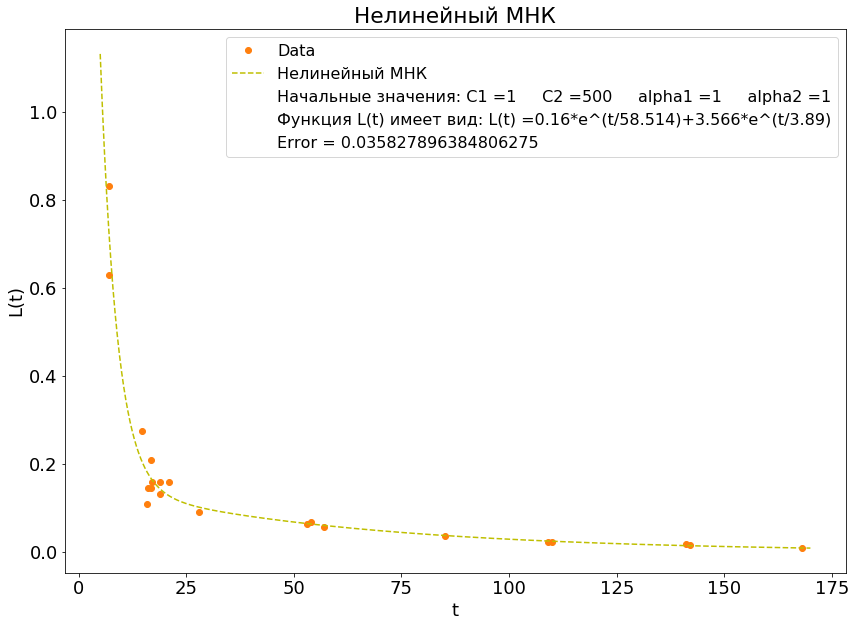

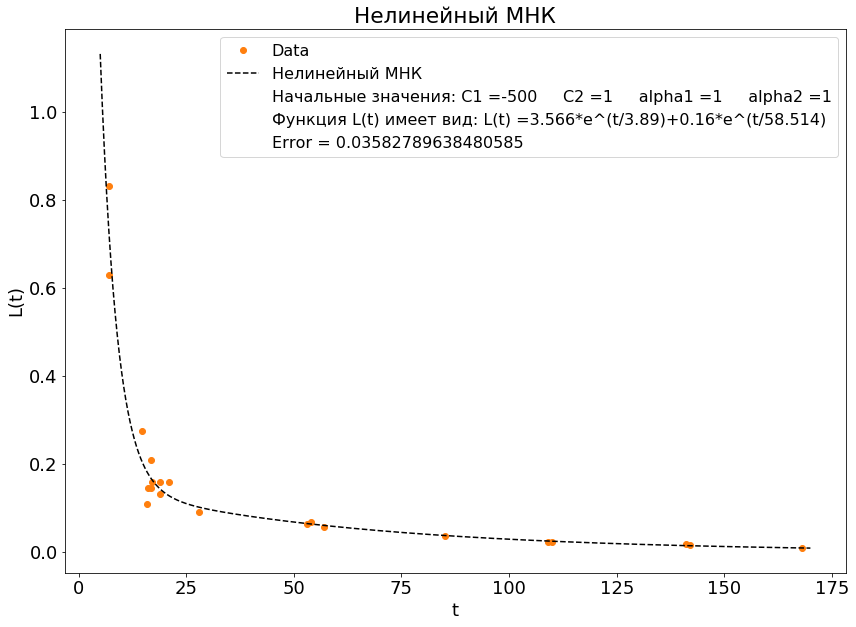

Ошибки стандартного отклонения для параметров: perr= [ 0.0900667   2.1284064  36.78961503  1.5116322 ]


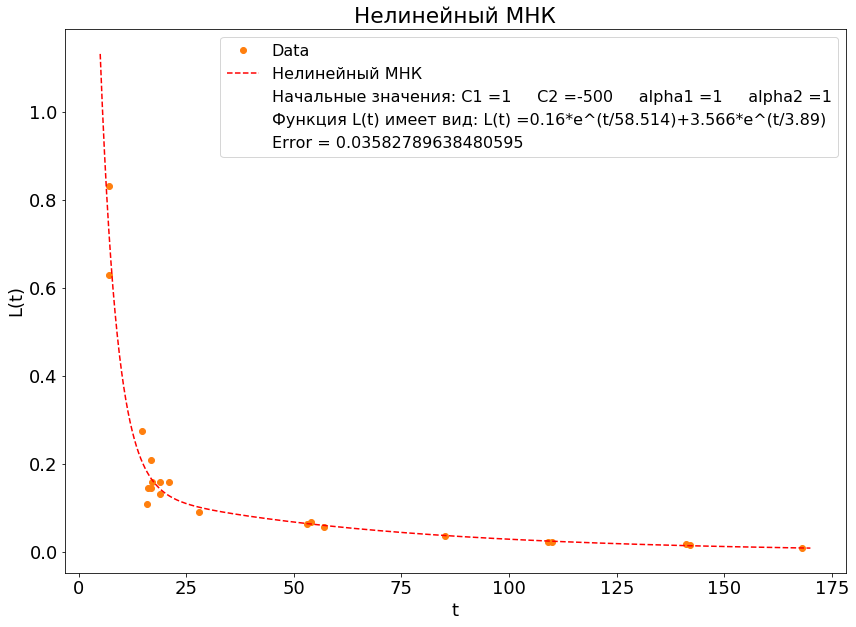

In [183]:
plt.figure(figsize=(14,10))
graf([500,1,1,1],'g--')
plt.show()

plt.figure(figsize=(14,10))
graf([1,500,1,1],'y--')
# plt.show()

plt.figure(figsize=(14,10))
graf([-500,1,1,1],'k--')
plt.show()

plt.figure(figsize=(14,10))
graf([1,-500,1,1],'r--')
plt.show()

Увеличение начального значения параметра $\alpha_{1}$ или $\alpha_{2}$ увеличивает ошибку не значительно, но более заметно, нежели в случае с параметрами $C_{1}$, $C_{2}$. Чем больше начальне значение $\alpha_{1}$ или $\alpha_{2}$, тем больше ошибка

при $C_{1}$ = 1; $C_{2}$ = 1; $\alpha_{1}$ = 20; $\alpha_{2}$ = 1: **Error** = 0.035827896384818474

при $C_{1}$ = 1; $C_{2}$ = 1; $\alpha_{1}$ = 500; $\alpha_{2}$ = 1: **Error** = 0.035827896384837486

при $C_{1}$ = 1; $C_{2}$ = 1; $\alpha_{1}$ = 1; $\alpha_{2}$ = 20: **Error** = 0.03582789638481739

при $C_{1}$ = 1; $C_{2}$ = 1; $\alpha_{1}$ = 1; $\alpha_{2}$ = 500: **Error** = 0.03582789638483772

Если оба начальных значения $\alpha_{1}$ и $\alpha_{2}$ велики, например,

 $C_{1}$ = 1; $C_{2}$ = 1; $\alpha_{1}$ = 200; $\alpha_{2}$ = 200, ошибка значительно возрастает: **Error** = 0.04335603019337958

Ошибки стандартного отклонения для параметров: perr= [ 0.09006769  2.12868573 36.78716788  1.51166177]


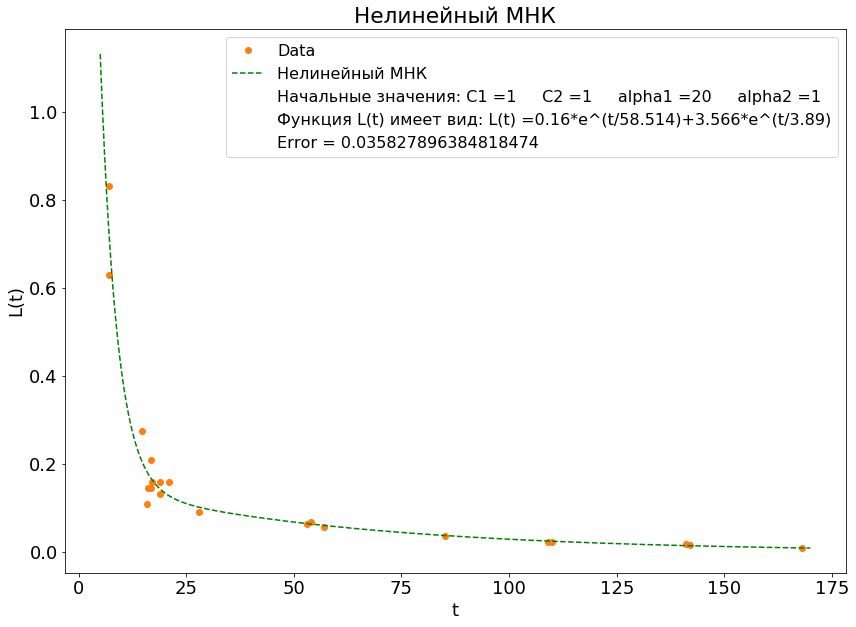

Ошибки стандартного отклонения для параметров: perr= [ 0.09006814  2.12883189 36.78592203  1.51168018]


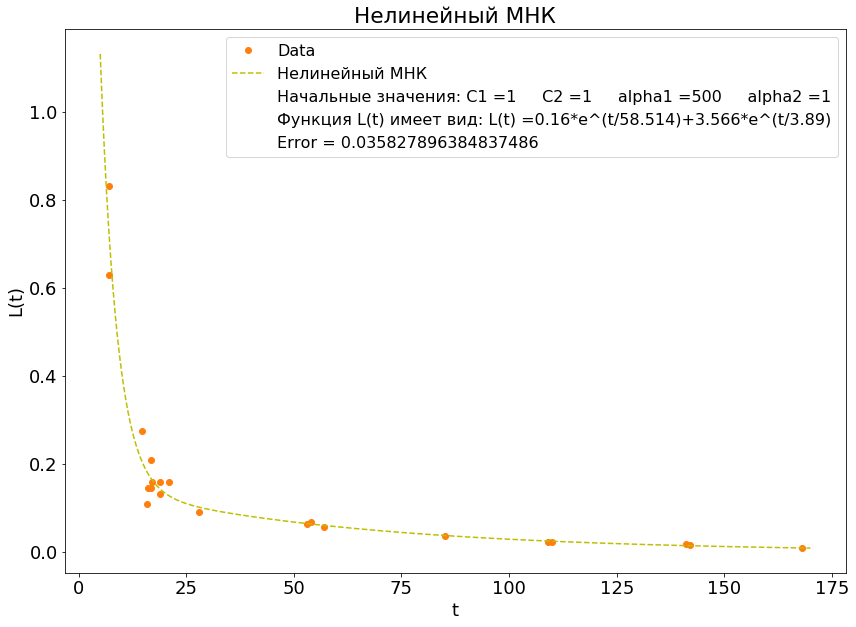

Ошибки стандартного отклонения для параметров: perr= [ 2.12868602  0.09006769  1.51166176 36.7871641 ]


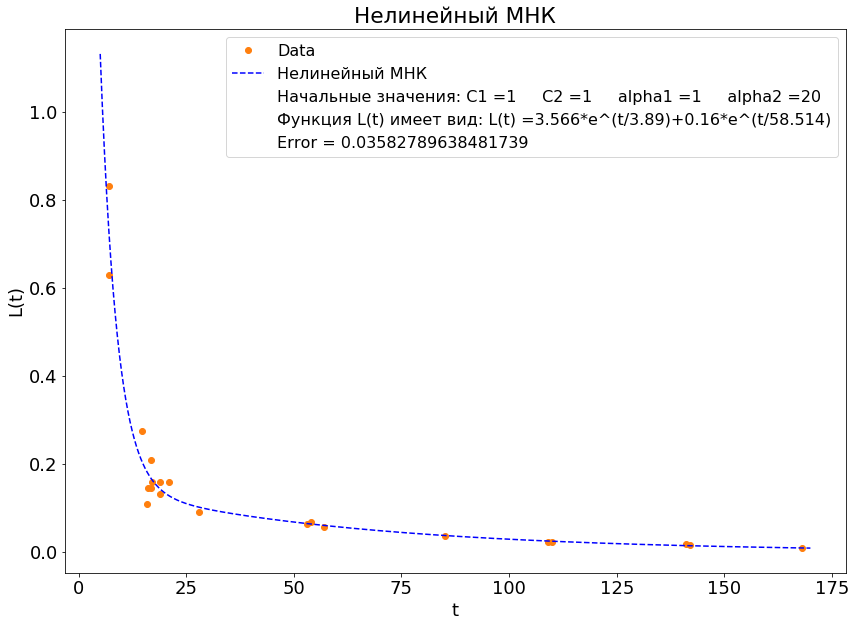

Ошибки стандартного отклонения для параметров: perr= [ 2.12883206  0.09006815  1.5116802  36.78591909]


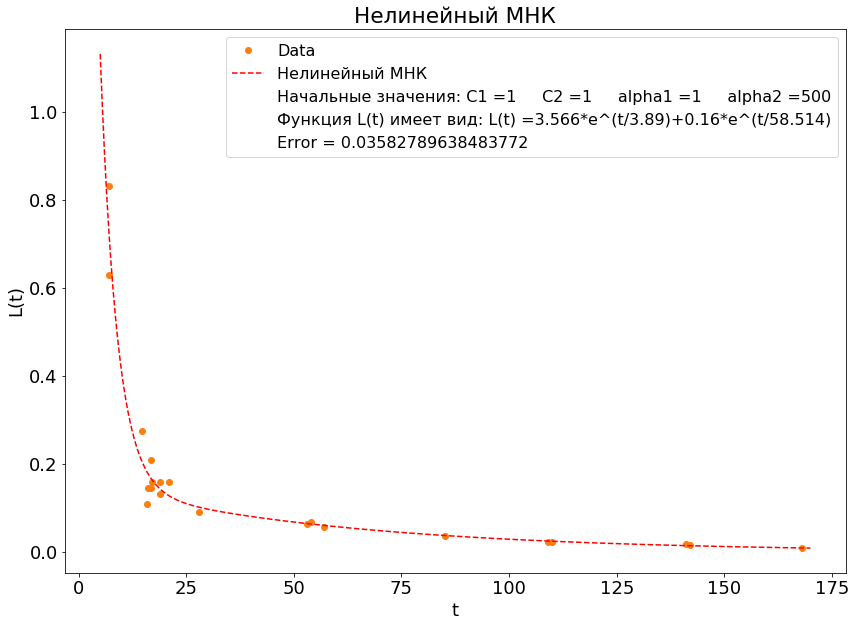

Ошибки стандартного отклонения для параметров: perr= [3.75355972e-01 3.80353390e-02 9.23896019e-01 2.23568540e+15]


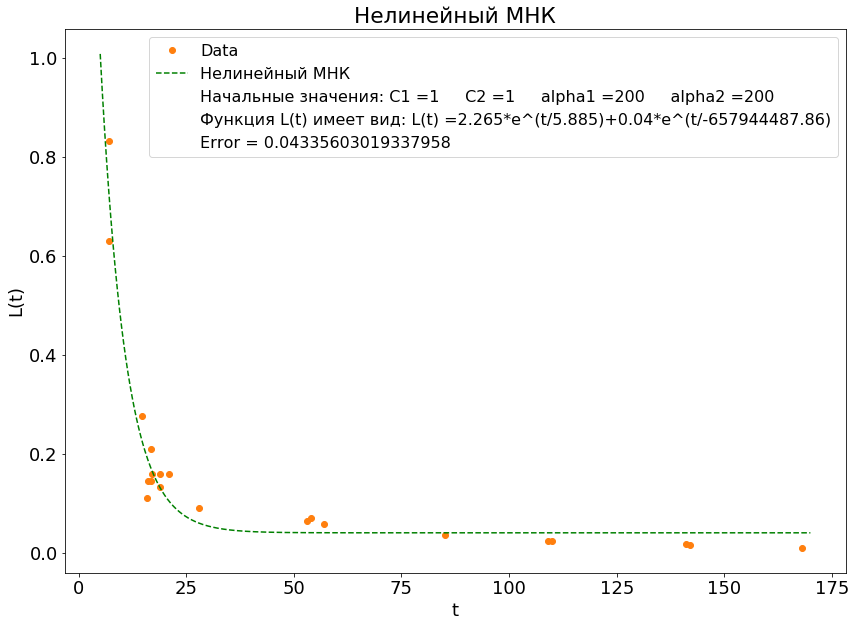

In [184]:
plt.figure(figsize=(14,10))
graf([1,1,20,1],'g--')
plt.show()

plt.figure(figsize=(14,10))
graf([1,1,500,1],'y--')
plt.show()

plt.figure(figsize=(14,10))
graf([1,1,1,20],'b--')
plt.show()

plt.figure(figsize=(14,10))
graf([1,1,1,500],'r--')
plt.show()

plt.figure(figsize=(14,10))
graf([1,1,200,200],'g--')
plt.show()

## Аппроксимация одной экспонентой. Линейный МНК

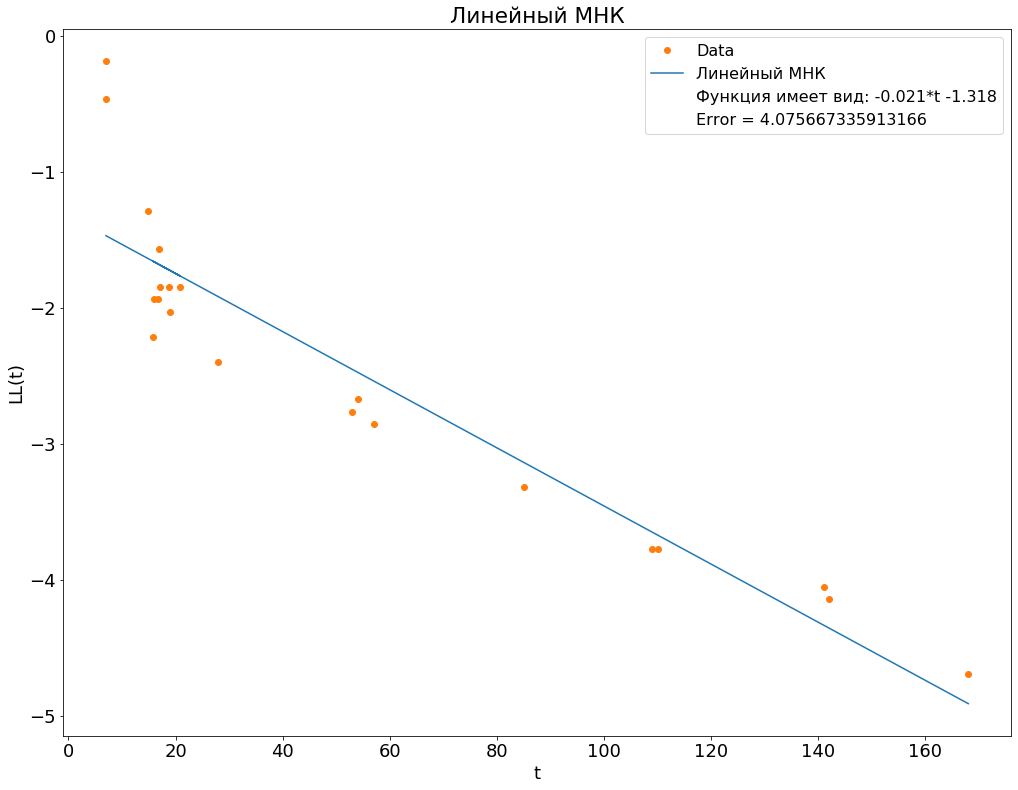

In [185]:
LLdata = []
for i in range(len(Ldata)):
    LLdata.append(math.log(Ldata[i]))
    
m = len(tdata)
T_matrix = np.stack((np.ones(m), tdata)).T
beta, residuals, _, _ = linalg.lstsq(T_matrix, LLdata)
beta0, beta1 = beta
plt.figure(figsize=(17,13))
Data, = plt.plot(tdata,LLdata, 'o', color='tab:orange', label='Data')
L_LS, = plt.plot(tdata, T_matrix@beta, label='Линейный МНК')
    
text4 = 'Функция имеет вид: ' + str(round(beta1,3)) + '*t ' + str(round(beta0,3))
text5 = 'Error = ' + str(residuals)
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)    
plt.legend([Data, L_LS, extra, extra, extra],[Data.get_label(), L_LS.get_label(), text4, text5], prop={'size': 16})

plt.title('Линейный МНК')
plt.xlabel("t")
plt.ylabel('LL(t)')
plt.show()

## Сравнение нелинейного и линейного МНК

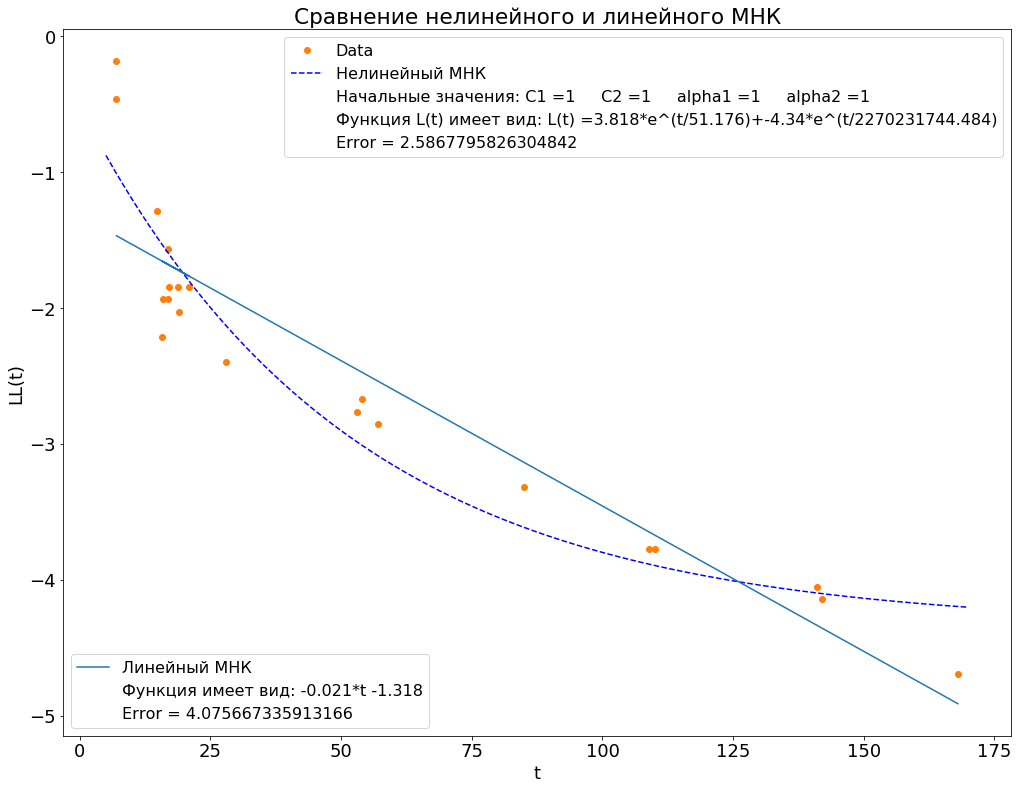

In [186]:
plt.figure(figsize=(17,13))
plt.title('Сравнение нелинейного и линейного МНК')
plt.xlabel("t")
plt.ylabel("LL(t)")

p0 = [1, 1, 1, 1]
popt, pcov = curve_fit(funcL, tdata, LLdata, p0)
Error_val = Error(LLdata,popt)
perr = np.sqrt(np.diag(pcov))
L = [funcL(i, *popt) for i in tt]   
Data, = plt.plot(tdata, LLdata,'o', color='tab:orange',label='Data')
NL_LS, = plt.plot(tt,L,'b--', label='Нелинейный МНК')  
text1 = 'Начальные значения: C1 =' + str(p0[0]) + '     C2 =' + str(p0[1]) + '     alpha1 =' + str(p0[2]) + '     alpha2 =' + str(p0[3])
text2 = 'Функция L(t) имеет вид: L(t) =' + str(round(popt[0],3)) + '*e^(t/' + str(round(popt[2],3)) + ')+' + str(round(popt[1],3)) + '*e^(t/' + str(round(popt[3],3)) + ')'
text3 = 'Error = ' + str(Error_val)

L_LS, = plt.plot(tdata, T_matrix@beta, label='Линейный МНК')

# Create legends
first_legend = plt.legend([Data, NL_LS, extra, extra, extra],[Data.get_label(), NL_LS.get_label(), text1, text2,  text3], loc=1, prop={'size': 16})
ax = plt.gca().add_artist(first_legend)
plt.legend([L_LS, extra, extra, extra],[L_LS.get_label(), text4, text5], loc=3, prop={'size': 16})
plt.show()

Нелинейный МНК даёт Error= 2.5867795826304842

Линейный МНК даёт Error= 4.075667335913166

Очевидно, что **линейный МНК проигрывает нелинейному МНК в точности**